<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/taipei_wordcloud_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.04.24 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

#**Word Cloud Generated from Tf-idf for Clusters (Taipei)**



####**Contents:**

1. Read file with clustering results
2. Tf-idf vectorizer
3. Create a dataframe for each clustering method
4. Method 1: Calculate average tf-idf for each cluster (straightforward method)
5. Method 2: Regard each cluster as a document and recalculate tf-idf for each term
6. Word Cloud

<br/>

##**1. Read file with clustering results**

---



In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
cluster_result = pd.read_csv('/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/taipei/hierarchical_textcluster_pca_taipei_r.csv')

In [3]:
# cluster size
cluster_method_name = ['cluster_complete_3', 'cluster_complete_4', 'cluster_avg_3', 'cluster_avg_4', 'cluster_ward_3', 'cluster_ward_4']
clusterSizeDf = pd.DataFrame({'cluster':list('1234')})
for i in cluster_method_name:
  c = cluster_result[['c0101', i]].groupby(i).count().reset_index(i)
  clusterSizeDf[i] = c[['c0101']]

clusterSizeDf

,cluster,cluster_complete_3,cluster_complete_4,cluster_avg_3,cluster_avg_4,cluster_ward_3,cluster_ward_4
0,1,2563.0,1723,1845.0,1845,2946.0,1547
1,2,667.0,840,1470.0,1470,1210.0,1399
2,3,2324.0,667,2239.0,689,1398.0,1210
3,4,NaN,2324,NaN,1550,NaN,1398


##**2. Tf-idf vectorizer**


---


In [4]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# text contents in dataframe to array
contents = np.array(cluster_result['content']) 
contents

# tfidf vectorizer
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b') 
tfidf_matrix = vectorizer.fit_transform(contents)

# See all terms
terms = vectorizer.get_feature_names_out()
print("Terms: ",terms)

# Store vectorized texts in df
cluster_result['tfidf'] = list(tfidf_matrix.toarray())
cluster_result

Terms:  ['24小時' '一般' '三十一年至三十五年屋齡' '三十六年至四十年屋齡' '中公設比' '二十ㄧ年至二十五年屋齡' '二十六年至三十年屋齡'
 '五年內屋齡' '六年至十年屋齡' '其他管理形式' '北' '十一年至十五年屋齡' '十六年至二十年屋齡' '南' '四十年以上屋齡'
 '多戶數' '多方位' '大公設比' '小公設比' '少戶數' '日間管理' '有平面車位' '有機械車位' '東' '東北' '東南'
 '極多戶數' '極少戶數' '無平面車位' '無機械車位' '無管理' '臨單線道' '臨多線道' '臨雙線道' '西' '西北' '西南'
 '近一年有實價登錄' '近一年無實價登錄' '重點']


,c0101,content,tfidf,cluster_complete_3,cluster_complete_4,cluster_avg_3,cluster_avg_4,cluster_ward_3,cluster_ward_4
0,0000251,"東,24小時,重點,三十一年至三十五年屋齡,極多戶數,小公設比,近一年有實價登錄,臨單線道,...","[0.20543258198430686, 0.0, 0.439331574195482, ...",3,4,2,2,2,3
1,0000252,"南,24小時,重點,二十六年至三十年屋齡,少戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.2555459672798244, 0.0, 0.0, 0.0, 0.36861481...",3,4,2,2,2,3
2,0000253,"日間管理,一般,二十六年至三十年屋齡,少戶數,大公設比,近一年有實價登錄,臨單線道,有平面車...","[0.0, 0.3076133515793043, 0.0, 0.0, 0.0, 0.0, ...",3,4,2,2,2,3
3,0000254,"南,24小時,重點,二十六年至三十年屋齡,多戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.2263930035351384, 0.0, 0.0, 0.0, 0.32656283...",3,4,2,2,2,3
4,0000260,"東,日間管理,一般,二十六年至三十年屋齡,極少戶數,近一年無實價登錄,臨單線道,有平面車位,...","[0.0, 0.29548536930373753, 0.0, 0.0, 0.0, 0.0,...",1,2,1,1,3,4
...,...,...,...,...,...,...,...,...,...
5549,Y001263,"西北,無管理,重點,十一年至十五年屋齡,極少戶數,大公設比,近一年無實價登錄,臨單線道,有平...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,3,3,4,1,1
5550,Y001264,"東,東北,24小時,重點,十一年至十五年屋齡,多戶數,大公設比,近一年有實價登錄,臨單線道,...","[0.19391904195114185, 0.0, 0.0, 0.0, 0.0, 0.0,...",3,4,3,4,1,1
5551,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,中公設比,近一年有實價登錄,臨多線道,有平面...","[0.24200769250060306, 0.0, 0.0, 0.0, 0.3490863...",3,4,3,4,1,1
5552,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,大公設比,近一年無實價登錄,有平面車位,無...","[0.2665929601642648, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,4,3,4,1,1


##**3. Create a dataframe for each clustering method**


---


In [5]:
cluster_complete_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_complete_3']]
cluster_complete_4 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_complete_4']]
cluster_avg_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_avg_3']]
cluster_avg_4 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_avg_4']]
cluster_ward_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_ward_3']]
cluster_ward_4 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_ward_4']]

cluster_complete_3

,c0101,content,tfidf,cluster_complete_3
0,0000251,"東,24小時,重點,三十一年至三十五年屋齡,極多戶數,小公設比,近一年有實價登錄,臨單線道,...","[0.20543258198430686, 0.0, 0.439331574195482, ...",3
1,0000252,"南,24小時,重點,二十六年至三十年屋齡,少戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.2555459672798244, 0.0, 0.0, 0.0, 0.36861481...",3
2,0000253,"日間管理,一般,二十六年至三十年屋齡,少戶數,大公設比,近一年有實價登錄,臨單線道,有平面車...","[0.0, 0.3076133515793043, 0.0, 0.0, 0.0, 0.0, ...",3
3,0000254,"南,24小時,重點,二十六年至三十年屋齡,多戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.2263930035351384, 0.0, 0.0, 0.0, 0.32656283...",3
4,0000260,"東,日間管理,一般,二十六年至三十年屋齡,極少戶數,近一年無實價登錄,臨單線道,有平面車位,...","[0.0, 0.29548536930373753, 0.0, 0.0, 0.0, 0.0,...",1
...,...,...,...,...
5549,Y001263,"西北,無管理,重點,十一年至十五年屋齡,極少戶數,大公設比,近一年無實價登錄,臨單線道,有平...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
5550,Y001264,"東,東北,24小時,重點,十一年至十五年屋齡,多戶數,大公設比,近一年有實價登錄,臨單線道,...","[0.19391904195114185, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
5551,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,中公設比,近一年有實價登錄,臨多線道,有平面...","[0.24200769250060306, 0.0, 0.0, 0.0, 0.3490863...",3
5552,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,大公設比,近一年無實價登錄,有平面車位,無...","[0.2665929601642648, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3


##**4. Method 1: Calculate average tf-idf for each cluster (straightforward method)**

*   Regard each observation as a document and calculate tf-idf for each term (just like what we do in [text clustering](https://github.com/angel870326/Hierarchical-Clustering/blob/main/newtaipei_pca_hierarchical_text.ipynb))

*   Calculate average tf-idf for each cluster


In [6]:
# Build a dataframe for a cluster 
def clusterdf(method,column,clusterID):
  return method[method[column] == clusterID]

# Calculate average tfidf for a cluster
def avgTfidf(clusterdf):
  return clusterdf['tfidf'].to_numpy().mean(axis=0)

# Store feature weights for clusters
cluster_feature_weight_1 = pd.DataFrame(terms, columns=['feature']) 
def clusterFeatureWeight(clusterType,clusterResult,clusterSize):
  for i in range(1,clusterSize+1):
    cluster = clusterdf(clusterResult,clusterType,i)
    cluster_feature_weight_1['%s_%d'%(clusterType[8:],i)] = pd.DataFrame(avgTfidf(cluster))

In [7]:
clusterFeatureWeight('cluster_complete_3',cluster_complete_3,3)
clusterFeatureWeight('cluster_complete_4',cluster_complete_4,4)
clusterFeatureWeight('cluster_avg_3',cluster_avg_3,3)
clusterFeatureWeight('cluster_avg_4',cluster_avg_4,4)
clusterFeatureWeight('cluster_ward_3',cluster_ward_3,3)
clusterFeatureWeight('cluster_ward_4',cluster_ward_4,4)

cluster_feature_weight_1

,feature,complete_3_1,complete_3_2,complete_3_3,complete_4_1,complete_4_2,complete_4_3,complete_4_4,avg_3_1,avg_3_2,...,avg_4_2,avg_4_3,avg_4_4,ward_3_1,ward_3_2,ward_3_3,ward_4_1,ward_4_2,ward_4_3,ward_4_4
0,24小時,0.064763,0.122650,0.202190,0.041718,0.112035,0.122650,0.202190,0.049485,0.170278,...,0.170278,0.189144,0.158554,0.156191,0.160719,0.045121,0.158579,0.153549,0.160719,0.045121
1,一般,0.193784,0.122627,0.034584,0.240058,0.098867,0.122627,0.034584,0.220774,0.045562,...,0.045562,0.057710,0.093399,0.097867,0.050791,0.221074,0.094087,0.102047,0.050791,0.221074
2,三十一年至三十五年屋齡,0.060705,0.000000,0.035206,0.089519,0.001600,0.000000,0.035206,0.061593,0.083915,...,0.083915,0.000598,0.000000,0.000291,0.059862,0.117394,0.000000,0.000612,0.059862,0.117394
3,三十六年至四十年屋齡,0.088787,0.000000,0.040653,0.088034,0.090332,0.000000,0.040653,0.109746,0.081001,...,0.081001,0.000000,0.000313,0.000000,0.103831,0.140489,0.000000,0.000000,0.103831,0.140489
4,中公設比,0.067867,0.083976,0.112829,0.052988,0.098385,0.083976,0.112829,0.060623,0.122254,...,0.122254,0.148291,0.063505,0.101894,0.097588,0.052867,0.063608,0.144230,0.097588,0.052867
5,二十ㄧ年至二十五年屋齡,0.040926,0.000000,0.073735,0.059806,0.002199,0.000000,0.073735,0.084672,0.079325,...,0.079325,0.000000,0.002209,0.093638,0.000000,0.000283,0.001980,0.194992,0.000000,0.000283
6,二十六年至三十年屋齡,0.067456,0.001407,0.061979,0.052703,0.097718,0.001407,0.061979,0.094892,0.097139,...,0.097139,0.000000,0.000000,0.000000,0.117483,0.125691,0.000000,0.000000,0.117483,0.125691
7,五年內屋齡,0.025119,0.000000,0.016578,0.006217,0.063888,0.000000,0.016578,0.000352,0.000000,...,0.000000,0.000000,0.065973,0.034931,0.000000,0.000000,0.066125,0.000437,0.000000,0.000000
8,六年至十年屋齡,0.029790,0.000000,0.075313,0.044313,0.000000,0.000000,0.075313,0.000000,0.000000,...,0.000000,0.000000,0.162180,0.085329,0.000000,0.000000,0.162494,0.000000,0.000000,0.000000
9,其他管理形式,0.005743,0.013761,0.005355,0.005535,0.006168,0.013761,0.005355,0.005738,0.005116,...,0.005116,0.005031,0.009527,0.007933,0.005648,0.004390,0.009546,0.006149,0.005648,0.004390


##**5. Method 2: Regard each cluster as a document and recalculate tf-idf for each term**




In [8]:
# Group contents(row) in the same cluster(column value)
def groupClusterContents(clusterType,clusterResult):
  return clusterResult.groupby(clusterType)['content'].agg(lambda column: ",".join(column)).reset_index()

# tfidf vectorizer
def tfidfVectorize(clusterResult):
  content = np.array(clusterResult['content']) 
  vectorize = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b') 
  tfidfMatrix = vectorize.fit_transform(content)
  # Store vectorized texts in df
  clusterResult['tfidf'] = list(tfidfMatrix.toarray())

# Store feature weights for clusters
cluster_feature_weight_2 = pd.DataFrame(terms, columns=['feature']) 
def createFeatureWeightDF(clusterType,clusterResult):
  for i in range(1,clusterResult.shape[0]+1):
    tfidfweight = clusterResult.iloc[i-1,-1]
    cluster_feature_weight_2['%s_%d'%(clusterType[8:],i)] = pd.DataFrame(tfidfweight)

# Create feature weight dataframe
def method2(clusterType,clusterResult):
  clusterName = clusterType[8:]
  clusterName = groupClusterContents(clusterType,clusterResult)
  tfidfVectorize(clusterName)
  createFeatureWeightDF(clusterType,clusterName)

In [9]:
method2('cluster_complete_3',cluster_complete_3)
method2('cluster_complete_4',cluster_complete_4)
method2('cluster_avg_3',cluster_avg_3)
method2('cluster_avg_4',cluster_avg_4)
method2('cluster_ward_3',cluster_ward_3)
method2('cluster_ward_4',cluster_ward_4)

cluster_feature_weight_2

,feature,complete_3_1,complete_3_2,complete_3_3,complete_4_1,complete_4_2,complete_4_3,complete_4_4,avg_3_1,avg_3_2,...,avg_4_2,avg_4_3,avg_4_4,ward_3_1,ward_3_2,ward_3_3,ward_4_1,ward_4_2,ward_4_3,ward_4_4
0,24小時,0.131424,0.215636,0.388813,0.078560,0.230992,0.215636,0.388539,0.095330,0.331595,...,0.327664,0.330281,0.295501,0.311416,0.312255,0.084672,0.300969,0.294233,0.307403,0.083354
1,一般,0.319396,0.183190,0.055265,0.374545,0.168210,0.183190,0.055226,0.348331,0.071965,...,0.071111,0.085651,0.140841,0.159245,0.079565,0.339695,0.144633,0.160671,0.078329,0.334407
2,三十一年至三十五年屋齡,0.074573,0.000000,0.043152,0.099474,0.002173,0.000000,0.040961,0.056367,0.077548,...,0.093728,0.000754,0.000000,0.000329,0.056296,0.106176,0.000000,0.000809,0.067788,0.127847
3,三十六年至四十年屋齡,0.121024,0.000000,0.054256,0.106579,0.120984,0.000000,0.051500,0.110136,0.084372,...,0.101976,0.000000,0.000360,0.000000,0.140150,0.176093,0.000000,0.000000,0.161881,0.203392
4,中公設比,0.099836,0.107480,0.152860,0.073305,0.146295,0.107480,0.152752,0.084940,0.168124,...,0.166131,0.183010,0.083799,0.144275,0.134735,0.072240,0.085519,0.195715,0.132641,0.071115
5,二十ㄧ年至二十五年屋齡,0.053482,0.000000,0.091099,0.070715,0.002898,0.000000,0.086472,0.082602,0.076928,...,0.092978,0.000000,0.002877,0.121382,0.000000,0.000433,0.002569,0.228874,0.000000,0.000405
6,二十六年至三十年屋齡,0.069807,0.001352,0.062712,0.050622,0.103650,0.001352,0.062668,0.120079,0.128217,...,0.148652,0.000000,0.000000,0.000000,0.154165,0.156190,0.000000,0.000000,0.178069,0.180404
7,五年內屋齡,0.022598,0.000000,0.015394,0.006090,0.052161,0.000000,0.014612,0.000334,0.000000,...,0.000000,0.000000,0.066634,0.042059,0.000000,0.000000,0.068003,0.000499,0.000000,0.000000
8,六年至十年屋齡,0.033144,0.000000,0.086557,0.055166,0.000000,0.000000,0.101485,0.000000,0.000000,...,0.000000,0.000000,0.267638,0.132306,0.000000,0.000000,0.273134,0.000000,0.000000,0.000000
9,其他管理形式,0.004290,0.008788,0.003724,0.003873,0.004738,0.008788,0.003721,0.003896,0.003722,...,0.003678,0.003081,0.006469,0.005593,0.004128,0.003024,0.006602,0.003967,0.004064,0.002977


##**6. Word Cloud**


---



In [10]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [11]:
# Madarin
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
font = 'TaipeiSansTCBeta-Regular.ttf'

--2022-04-24 05:44:23--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.100, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2vuobi7ufo4nq0f482sp8l1df26ta1di/1650779025000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-24 05:44:23--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2vuobi7ufo4nq0f482sp8l1df26ta1di/1650779025000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125.199.132

In [12]:
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload mask image from local device
uploaded = files.upload()
housemask = np.array(Image.open(BytesIO(uploaded['house1.jpg'])))

Saving house1.jpg to house1.jpg


In [13]:
# Create feature weight dictionary
def featureWeightDict(method,column):
  feature_weight = pd.DataFrame(method['feature'])
  feature_weight[column] = method[column]
  return feature_weight.set_index('feature')[column].to_dict()

# Word cloud
def createWordCloud(dictionary):
  return WordCloud(margin=0, font_path=font, background_color='white', max_words=15, width=housemask.shape[1], height=housemask.shape[0], mask = housemask).generate_from_frequencies(dictionary)

# Show cloud
def showWordCloud(cloud,size,num):
  ax = fig.add_subplot(1, size, num)
  ax.imshow(cloud, interpolation='bilinear')
  ax.axis("off")

# Create cluster word cloud
def createClusterWC(method,clusterList):
  num = 0
  for i in clusterList:
    num = num+1
    fwdict = featureWeightDict(method,i)
    wc = createWordCloud(fwdict)
    showWordCloud(wc,len(clusterList),num)


###**3.1 Complete-Link Cluster**

####3 clusters

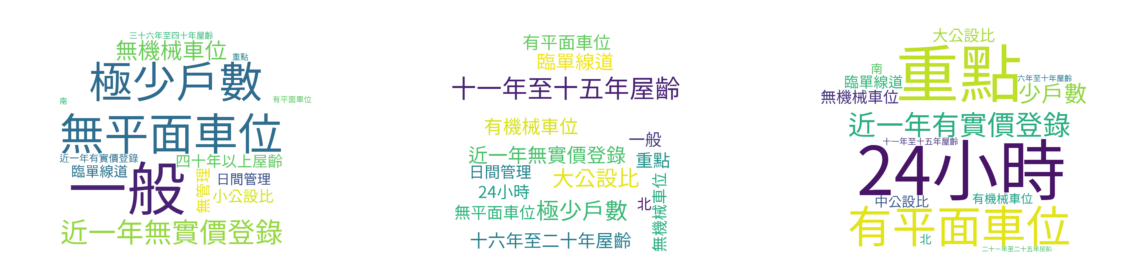

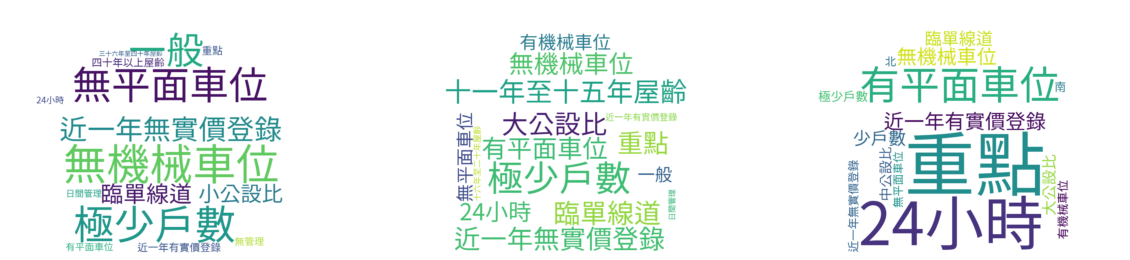

In [14]:
complete3_list = ['complete_3_1','complete_3_2','complete_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, complete3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, complete3_list)

####4 clusters

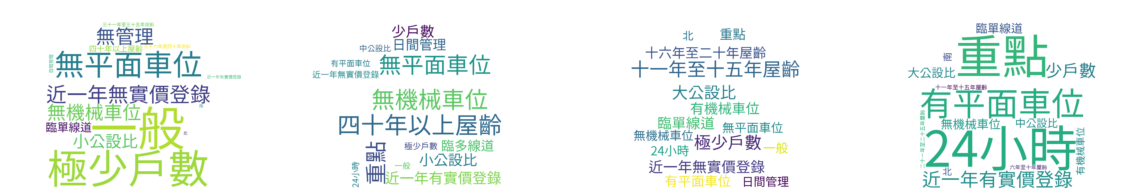

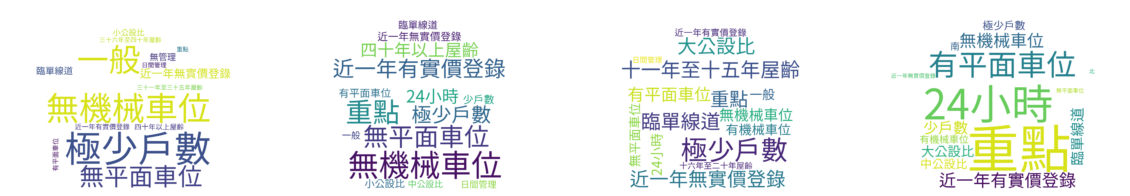

In [15]:
complete4_list = ['complete_4_1','complete_4_2','complete_4_3','complete_4_4']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, complete4_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, complete4_list)

###**3.2 Group Average Cluster**

####3 clusters

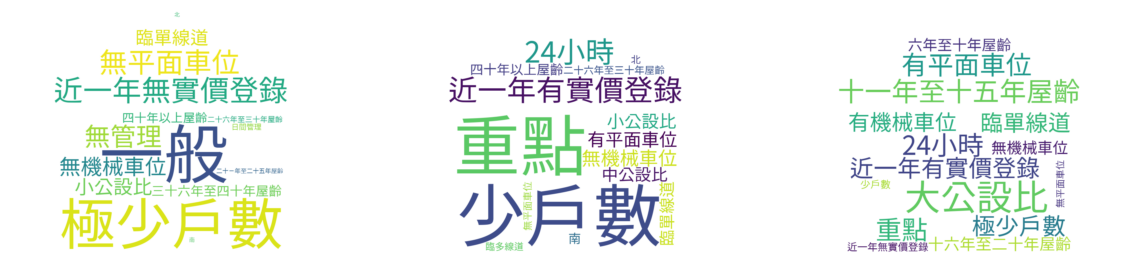

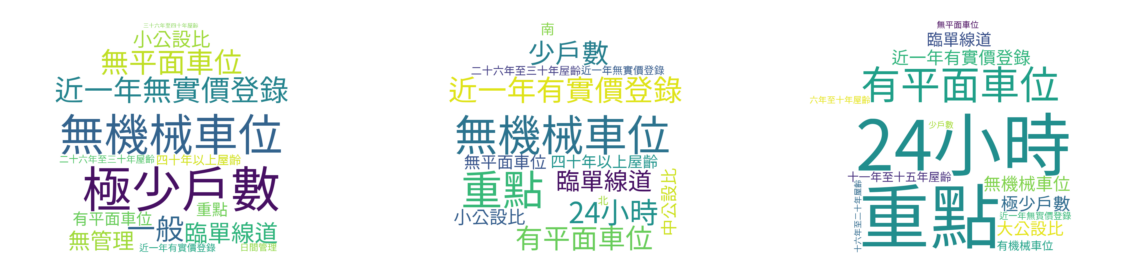

In [16]:
avg3_list = ['avg_3_1','avg_3_2','avg_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, avg3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, avg3_list)

####4 clusters

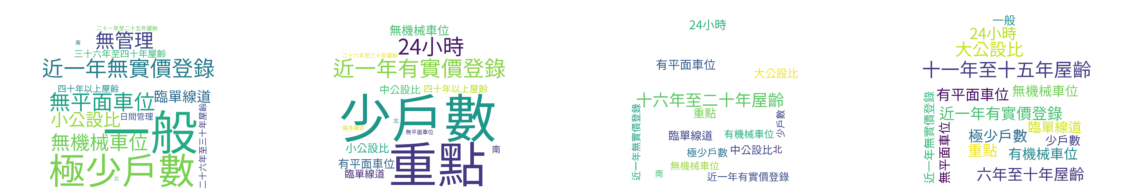

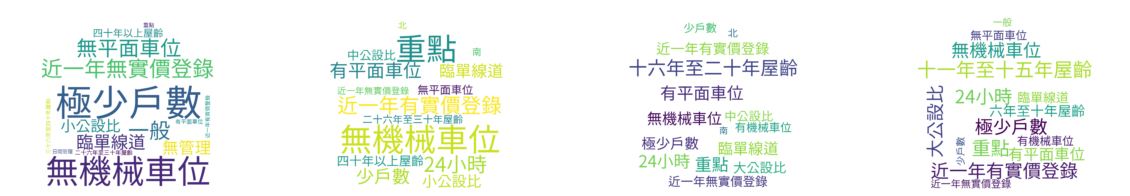

In [17]:
avg4_list = ['avg_4_1','avg_4_2','avg_4_3','avg_4_4']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, avg4_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, avg4_list)

###**3.3 Ward Cluster**

####3 clusters

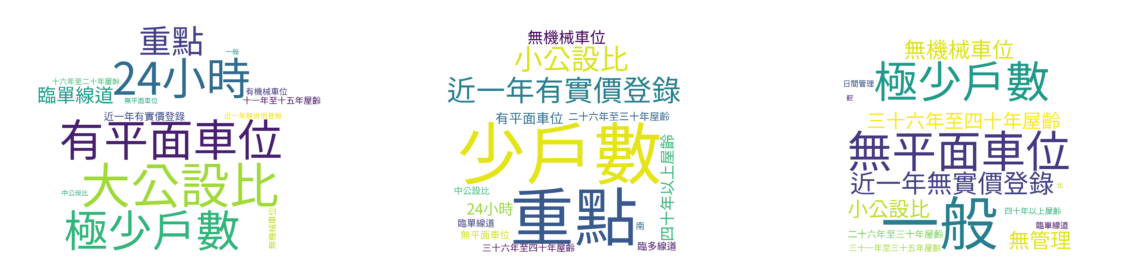

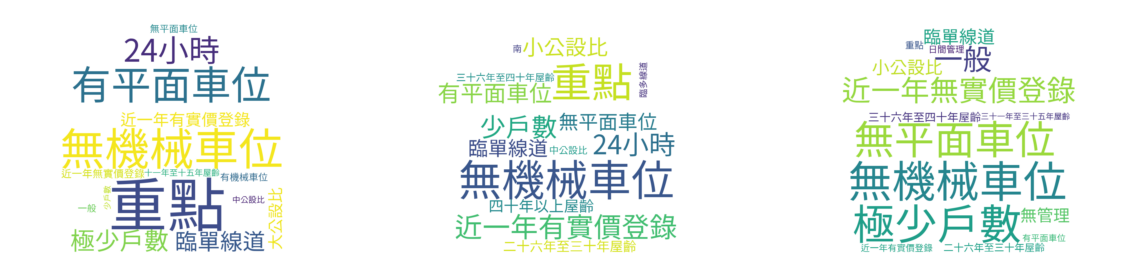

In [18]:
ward3_list = ['ward_3_1','ward_3_2','ward_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, ward3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, ward3_list)

####4 clusters

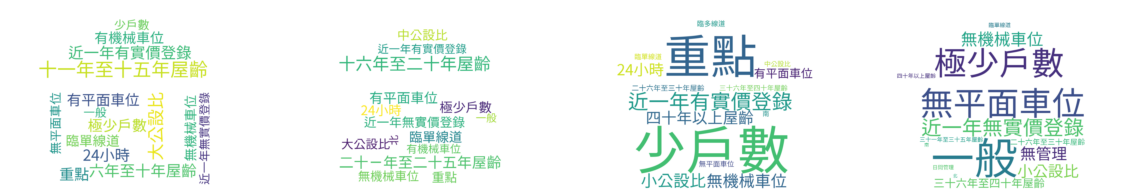

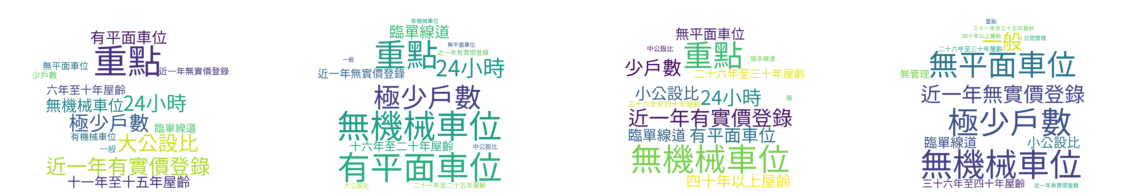

In [19]:
ward4_list = ['ward_4_1','ward_4_2','ward_4_3','ward_4_4']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, ward4_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, ward4_list)